In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
# import streamlit as st

In [7]:
# Read the data
data = pd.read_csv("wastedata.csv")
# pivot_table = data.pivot_table(index='Date', columns='Substream', values='Volume', aggfunc='sum')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       521 non-null    object 
 1   Building   521 non-null    object 
 2   Stream     521 non-null    object 
 3   Substream  521 non-null    object 
 4   Volume     487 non-null    float64
 5   Weight     520 non-null    float64
 6   Notes      370 non-null    object 
dtypes: float64(2), object(5)
memory usage: 28.6+ KB


In [16]:
stream_column = data["Stream"]

In [17]:
# Remove empty or missing values
stream_column = stream_column.dropna()

In [18]:
# Create a set of unique streams
unique_streams = set(stream_column)

In [19]:
for stream in unique_streams:
    print(stream)

Recycling in Landfill
Recycling
Reusables in Landfill
Reusables in Recycling
Reusables in Compost
Compost in Recycling
Landfill
Landfill in Recycling
Landfill in Compost
Food Waste in Landfill
Compost
Recycling in Compost
Compost in Landfill
Food Waste in Recycling


In [25]:
# Create a new stream called "misclassified_recycling"
new_stream = "misclassified_recycling"

# Filter the data to include only "Recycling in Landfill" and "Recycling in Compost"
filtered_data = data[data["Stream"].isin(["Recycling in Landfill", "Recycling in Compost"])]

# Change the stream values to "misclassified_recycling"
filtered_data["Stream"] = new_stream

# Append the filtered data to the original data
updated_data = pd.concat([data, filtered_data], ignore_index=True)

# Remove "Recycling in Landfill" and "Recycling in Compost" from the data
updated_data = updated_data[~updated_data["Stream"].isin(["Recycling in Landfill", "Recycling in Compost"])]

updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 756
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       521 non-null    object 
 1   Building   521 non-null    object 
 2   Stream     521 non-null    object 
 3   Substream  521 non-null    object 
 4   Volume     487 non-null    float64
 5   Weight     520 non-null    float64
 6   Notes      370 non-null    object 
dtypes: float64(2), object(5)
memory usage: 32.6+ KB


C:\Users\dhruv\AppData\Local\Temp\ipykernel_20948\2850706148.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Stream"] = new_stream


In [27]:
new_stream1 = "misclassified_reusables"

# Filter the data to include only "Reusables in Landfill," "Reusables in Compost," and "Reusables in Recycling"
filtered_data1 = updated_data[updated_data["Stream"].isin(["Reusables in Landfill", "Reusables in Compost", "Reusables in Recycling"])]

# Change the stream values to "misclassified_reusables"
filtered_data1["Stream"] = new_stream1

# Append the filtered data to the original data
updated_data1 = pd.concat([updated_data, filtered_data1], ignore_index=True)

# Remove "Reusables in Landfill," "Reusables in Compost," and "Reusables in Recycling" from the data
updated_data1 = updated_data1[~updated_data1["Stream"].isin(["Reusables in Landfill", "Reusables in Compost", "Reusables in Recycling"])]



C:\Users\dhruv\AppData\Local\Temp\ipykernel_20948\4262004596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["Stream"] = new_stream1


In [28]:
updated_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       521 non-null    object 
 1   Building   521 non-null    object 
 2   Stream     521 non-null    object 
 3   Substream  521 non-null    object 
 4   Volume     487 non-null    float64
 5   Weight     520 non-null    float64
 6   Notes      370 non-null    object 
dtypes: float64(2), object(5)
memory usage: 32.6+ KB


In [9]:
z_scores = np.abs((data['Volume'] - data['Volume'].mean()) / data['Volume'].std())
print(z_scores)

0      1.206060
1      1.206060
2      1.206060
3      0.370358
4      1.006093
         ...   
516    1.206060
517    1.206060
518    0.637401
519    1.251888
520    1.251888
Name: Volume, Length: 521, dtype: float64


In [13]:
outliers = z_scores > 2
# print(outliers)
data_cleaned = data[~outliers]
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 520
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       515 non-null    object 
 1   Building   515 non-null    object 
 2   Stream     515 non-null    object 
 3   Substream  515 non-null    object 
 4   Volume     481 non-null    float64
 5   Weight     514 non-null    float64
 6   Notes      364 non-null    object 
dtypes: float64(2), object(5)
memory usage: 32.2+ KB


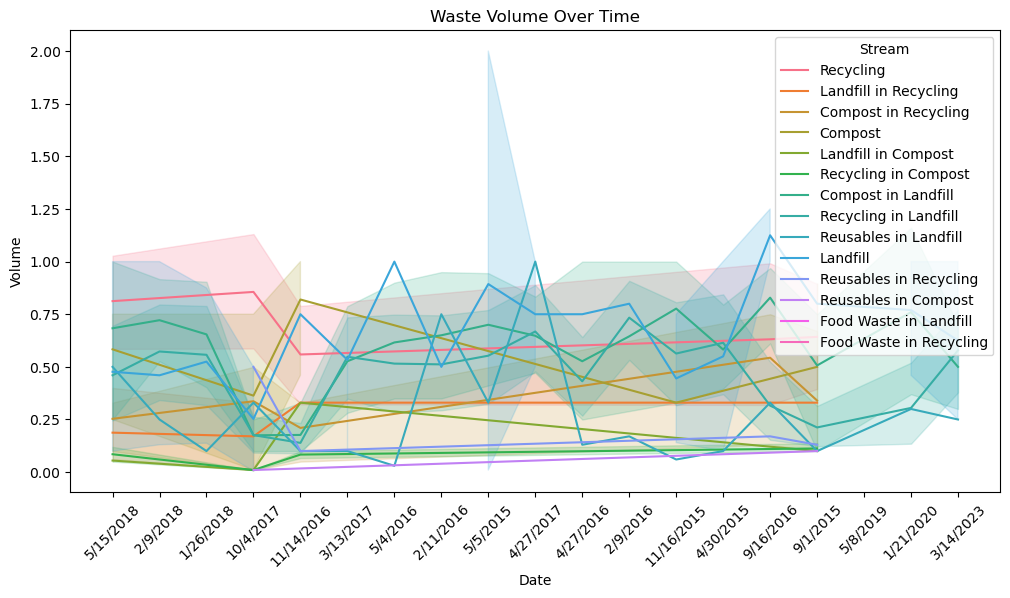

In [3]:
# Time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=data, hue='Stream')
plt.title('Waste Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()


In [4]:
# Treemap
treemap_data = data.groupby(['Building', 'Stream']).sum()['Volume'].reset_index()
fig = px.treemap(treemap_data, path=['Building', 'Stream'], values='Volume')
fig.update_layout(title='Waste Volume by Building and Stream')
fig.show()

/tmp/ipykernel_24733/340568292.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  treemap_data = data.groupby(['Building', 'Stream']).sum()['Volume'].reset_index()


In [7]:
# Sankey diagram
sankey_data = data.groupby(['Stream', 'Substream']).sum()['Volume'].reset_index()
fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=sankey_data['Substream'].unique(),
    ),
    link=dict(
        source=sankey_data['Stream'],
        target=sankey_data['Substream'],
        value=sankey_data['Volume'],
    ),
)])
fig.update_layout(title='Waste Flow by Stream and Substream')
fig.show()

/tmp/ipykernel_24733/3678239576.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [8]:
# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='Viridis'))

# Customize the layout
fig.update_layout(
    title='Waste Volume Heatmap',
    xaxis_title='Substream',
    yaxis_title='Date')

# Display the interactive heatmap
fig.show()

In [4]:
# Group the data by Substream and calculate the total volume for each substream
grouped_data = data.groupby('Substream')['Volume'].sum().reset_index()

# Create the bar chart using Plotly
fig = go.Figure(data=go.Bar(
    x=grouped_data['Substream'],
    y=grouped_data['Volume'],
    marker=dict(color='blue')
))

# Customize the layout
fig.update_layout(
    title='Total Waste Volume by Substream',
    xaxis_title='Substream',
    yaxis_title='Total Volume')

# Display the interactive bar chart
fig.show()

In [10]:
pip install pandas plotly streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 4.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 4.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 4.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 4.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.1 MB/s eta 0:00:0000:0100:01
  

In [6]:
# Create the interactive heat map using Plotly
fig_heatmap = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='Viridis'))

# Customize the layout
fig_heatmap.update_layout(
    title='Waste Volume Heatmap',
    xaxis_title='Substream',
    yaxis_title='Date')

# Display the interactive heatmap
fig_heatmap.show()

# Create the interactive bar chart using Plotly
fig_barchart = go.Figure(data=go.Bar(
    x=grouped_data['Substream'],
    y=grouped_data['Volume'],
    marker=dict(color='blue')))

# Set up the Streamlit app
st.title('Waste Analysis')
st.header('Interactive Heat Map')
st.plotly_chart(fig_heatmap)

st.header('Interactive Bar Chart')
st.plotly_chart(fig_barchart)

2023-05-21 12:55:23.011 
  command:

    streamlit run /home/dhruv590/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()